In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz
from tqdm import tqdm

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'AMP'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/AMP_Database3.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/test_off/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'AMP_off'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database3.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/test_off/
Project_results: ./Projects/AMP/results/
file_name_to_save: AMP_off
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/AMP/test_off/11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3off_01.mzML

Finished parsing mzML file: ./Projects/AMP/test_off/11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3off_01.mzML

Finished parsing mzML file: ./Projects/AMP/test_off/11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3off_01.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)
#print unique lipid classes
# print(df_MRM['Lipid'].unique())

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,1.653960e+05,NaN,227.1,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
1,NaN,1.033941e+05,NaN,241.1,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,241.1 -> 183.0
2,NaN,1.965730e+05,NaN,255.2,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,255.2 -> 183.0
3,NaN,2.347387e+05,NaN,269.1,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,269.1 -> 183.0
4,NaN,4.565588e+05,NaN,283.2,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,283.2 -> 183.0
...,...,...,...,...,...,...,...
160,NaN,1.105484e+06,NaN,507.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,507.4 -> 183.0
161,NaN,1.698046e+05,NaN,521.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,521.4 -> 183.0
162,NaN,1.301890e+05,NaN,533.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.4 -> 183.0
163,NaN,1.752246e+05,NaN,535.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,535.4 -> 183.0


Group for df_MRM as well

In [9]:
# Creating the Match_Group column
df_MRM['Match_Group'] = df_MRM.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
df_MRM
#print row with highest intensity

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition,Match_Group
0,NaN,1.653960e+05,NaN,227.1,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
1,NaN,1.033941e+05,NaN,241.1,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,241.1 -> 183.0,3
2,NaN,1.965730e+05,NaN,255.2,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,255.2 -> 183.0,6
3,NaN,2.347387e+05,NaN,269.1,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,269.1 -> 183.0,9
4,NaN,4.565588e+05,NaN,283.2,183.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,283.2 -> 183.0,12
...,...,...,...,...,...,...,...,...
160,NaN,1.105484e+06,NaN,507.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,507.4 -> 183.0,152
161,NaN,1.698046e+05,NaN,521.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,521.4 -> 183.0,155
162,NaN,1.301890e+05,NaN,533.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.4 -> 183.0,158
163,NaN,1.752246e+05,NaN,535.4,183.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,535.4 -> 183.0,164


In [10]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
1,NaN,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
2,NaN,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
3,NaN,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
4,NaN,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
...,...,...,...,...,...,...,...
383128,NaN,533.5,183.0,29.949050,41.180004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0
383129,NaN,533.5,183.0,29.961967,41.180004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0
383130,NaN,533.5,183.0,29.974883,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0
383131,NaN,533.5,183.0,29.987817,41.160004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [11]:
d1 = df_OzESI.iloc[:,1:9]

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (0, 15)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
1,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
2,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
3,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
4,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0
...,...,...,...,...,...,...
381966,533.5,183.0,14.935583,41.280003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0
381967,533.5,183.0,14.948517,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0
381968,533.5,183.0,14.961433,41.000004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0
381969,533.5,183.0,14.974350,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0


# create Group for OzESI df to iterate through it faster instead of checking every single row

In [12]:
# Creating the Match_Group column
d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Display the DataFrame with the new column
d1a

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group
0,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
1,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
2,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
3,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
4,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0
...,...,...,...,...,...,...,...
381966,533.5,183.0,14.935583,41.280003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161
381967,533.5,183.0,14.948517,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161
381968,533.5,183.0,14.961433,41.000004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161
381969,533.5,183.0,14.974350,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161


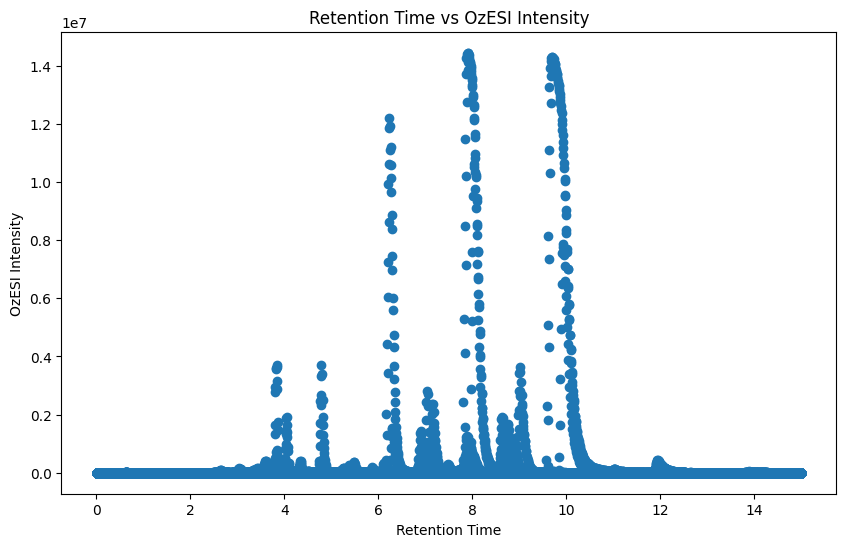

In [13]:


# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


# Pipeline for OzON Truth

Correct RTs add DB position based on correct RT

Nested for loops too slow but last resort if cannot get others to work

In [14]:
# d1b = d1a.copy()
# # Define a function to check if two ions are within the tolerance
# def is_within_tolerance(ion1, ion2, tolerance=0.3):
#     return abs(ion1 - ion2) <= tolerance

# # Initialize the Lipid column in d1a
# d1b['Lipid'] = None

# # Iterate through d1b and match lipids from df_MRM
# for index, row in d1b.iterrows():
#     for _, mrm_row in df_MRM.iterrows():
#         if is_within_tolerance(row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(row['Product_Ion'], mrm_row['Product_Ion']):
#             d1b.at[index, 'Lipid'] = mrm_row['Lipid']
#             break  # Stop searching once a match is found

# # Display the updated d1b
# print(d1b)

# import pandas as pd
# from tqdm import tqdm

# d1b = d1a.copy()

# # Define a function to check if two ions are within the tolerance
# def is_within_tolerance(ion1, ion2, tolerance=0.3):
#     return abs(ion1 - ion2) <= tolerance

# # Initialize the Lipid column in d1b
# d1b['Lipid'] = None

# # Iterate through d1b with a progress bar and match lipids from df_MRM
# for index, row in tqdm(d1b.iterrows(), total=d1b.shape[0], desc="Matching Lipids"):
#     for _, mrm_row in df_MRM.iterrows():
#         if is_within_tolerance(row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(row['Product_Ion'], mrm_row['Product_Ion']):
#             d1b.at[index, 'Lipid'] = mrm_row['Lipid']
#             break  # Stop searching once a match is found

# # Display the updated d1b
# print(d1b)


# Use merge instead of nested for loops

In [15]:
d1b = d1a.copy()

# Assuming df_MRM and d1b are already defined

# Create Match_Group in d1a if it doesn't exist
if 'Match_Group' not in d1a.columns:
    d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

# Copy Match_Group to d1b
d1b['Match_Group'] = d1a['Match_Group']

# Function to check if two ions are within the tolerance
def is_within_tolerance(ion1, ion2, tolerance=0.3):
    return abs(ion1 - ion2) <= tolerance

# Add a new column for Lipid in d1b
d1b['Lipid'] = None

# Iterate through each unique Match_Group in d1a
for group in d1a['Match_Group'].unique():
    # Extract a representative row for the current group from d1a
    group_row = d1a[d1a['Match_Group'] == group].iloc[0]

    # Find a matching lipid in df_MRM for the representative row
    for _, mrm_row in df_MRM.iterrows():
        if is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
            # Assign the lipid to all rows in the corresponding group in d1b
            d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
            break  # Stop searching once a match is found

# Display the updated d1b DataFrame
d1b

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid
0,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN
1,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN
2,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN
3,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN
4,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN
...,...,...,...,...,...,...,...,...
381966,533.5,183.0,14.935583,41.280003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN
381967,533.5,183.0,14.948517,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN
381968,533.5,183.0,14.961433,41.000004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN
381969,533.5,183.0,14.974350,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN


# Assign Correct_RT for each Lipid group is OzON to define ground truth RT for each lipid in each sample

In [16]:


d1c = d1b.copy()    
# Assuming your DataFrame is named d1c

import pandas as pd

# Assuming your DataFrame is named df

# Group by Match_Group and find the Retention_Time corresponding to the max OzESI_Intensity for each group
max_rt_per_group = d1c.groupby('Match_Group').apply(lambda x: x.loc[x['OzESI_Intensity'].idxmax(), 'Retention_Time'])

# Map the max retention time to the Correct_RT column for each group
d1c['Correct_RT'] = d1c['Match_Group'].map(max_rt_per_group)

d1c


# # print len of unique values in Correct_RT column
# print(len(d1c['Correct_RT'].unique()))




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT
0,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467
1,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467
2,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467
3,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467
4,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467
...,...,...,...,...,...,...,...,...,...
381966,533.5,183.0,14.935583,41.280003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217
381967,533.5,183.0,14.948517,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217
381968,533.5,183.0,14.961433,41.000004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217
381969,533.5,183.0,14.974350,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217


Filter out NaN values from Lipid column

In [17]:
import pandas as pd

# Assuming d1c is your DataFrame

# Copying d1c to d1d
d1d = d1c.copy()

#### Max Intensity
# # Group by Match_Group and filter out groups where all 'Lipid' values are NaN
# d1d = d1c.groupby('Match_Group').filter(lambda x: not x['Lipid'].isna().all())

# # Find the max OzESI_Intensity for each Match_Group
# max_intensity_per_group = d1d.groupby('Match_Group')['OzESI_Intensity'].max()

# # Map the max intensity to a new column Max_Intensity for each group
# d1d['Max_Intensity'] = d1d['Match_Group'].map(max_intensity_per_group)

# # Round the Correct_RT column to 2 decimal places and also Max_Intensity and OzESI_Intensity to 0 decimal places and Retention_Time to 2 decimal places
# d1d['Correct_RT'] = d1d['Correct_RT'].round(2)
# d1d['Max_Intensity'] = d1d['Max_Intensity'].round(0)
# d1d['OzESI_Intensity'] = d1d['OzESI_Intensity'].round(0)
# d1d['Retention_Time'] = d1d['Retention_Time'].round(2)

# # Keep only the row with the highest OzESI_Intensity in each Match_Group
## d1d = d1d.sort_values('OzESI_Intensity', ascending=False).drop_duplicates('Match_Group')
###############

#biology focused method
# def extract_details_from_sample_id(df, column_name='Sample_ID'):
#     """
#     Extracts details from the Sample_ID column and adds them as new columns: Cage, Mouse, Genotype, and Biology.

#     Args:
#     df (pandas.DataFrame): The DataFrame containing the Sample_ID column.
#     column_name (str): The name of the column to extract the details from. Default is 'Sample_ID'.

#     Returns:
#     pandas.DataFrame: The original DataFrame with added columns 'Cage', 'Mouse', 'Genotype', 'Biology'.
#     """
#     # Regular expression pattern to extract Cage, Mouse, Genotype, and Biology
#     pattern = r'^[^_]*_(?P<Cage>[^_]+)_(?P<Mouse>[^_]+)_(?P<Genotype>[^_]+)_(?P<Biology>[^_]+)'

#     # Extract the matched patterns and create the new columns
#     df_extracted = df[column_name].str.extract(pattern)

#     # Add the new columns to the original DataFrame
#     df = pd.concat([df, df_extracted[['Cage', 'Mouse', 'Genotype', 'Biology']]], axis=1)

#     return df

#generalized method
def extract_details_from_sample_id(df, column_name='Sample_ID', new_columns=None):
    """
    Extracts specified details from the Sample_ID column and adds them as new columns.

    Args:
    df (pandas.DataFrame): The DataFrame containing the Sample_ID column.
    column_name (str): The name of the column to extract the details from. Default is 'Sample_ID'.
    new_columns (dict): A dictionary where keys are the names of new columns to be added, 
                        and values are lists of possible string values for those columns.

    Returns:
    pandas.DataFrame: The original DataFrame with added columns.
    """
    # Check if new_columns is provided
    if new_columns is None or not isinstance(new_columns, dict):
        raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

    # Loop through each new column and its possible values
    for col, values in new_columns.items():
        # Create a regular expression pattern for each column
        pattern = f"(?P<{col}>{'|'.join(values)})"

        # Extract the matched pattern and create the new column
        df_extracted = df[column_name].str.extract(pattern)

        # Add the new column to the original DataFrame
        df = pd.concat([df, df_extracted[[col]]], axis=1)

    return df


new_columns = {'Biology': ['cortex', 'dienc', 'hippo','cereb'],
               'Genotype': ['5xFAD','WT'],
               'Cage': ['FAD231', 'FAD249', 'FAD257'],
               'Mouse': ['m1','m2','m3','m4','m5']}
d1d = extract_details_from_sample_id(d1d, new_columns=new_columns)

# # Usage Example:
# # Assuming your DataFrame is named df
# d1d = extract_details_from_sample_id(d1d)



# Group by Match_Group and filter out groups where the max Max_Intensity is under 300
# d1d = d1d.groupby('Match_Group').filter(lambda x: x['Max_Intensity'].max() >= 2000)

# d1d now contains one row per Match_Group with the highest OzESI_Intensity
#save the data to csv
# d1d.to_csv('Projects/FaceFats/data/OzOFF_CorrectRT/FF_Brain5xFAD_OzOFF_CorrectRT.csv')
d1d


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse
0,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1
1,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1
2,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1
3,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1
4,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381966,533.5,183.0,14.935583,41.280003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1
381967,533.5,183.0,14.948517,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1
381968,533.5,183.0,14.961433,41.000004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1
381969,533.5,183.0,14.974350,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1


# Filter lipids for plots to take out any double bond MRMs


In [28]:
def filter_lipids(df, column_name='Lipid', filter_strings=('n', 'd', 'Z', '13:0',':1')):
    """
    Filters out rows in the DataFrame where the specified column contains any of the given strings.

    Parameters:
    df (DataFrame): The DataFrame to filter.
    column_name (str): The name of the column to apply the filter on.
    filter_strings (tuple): A tuple of strings to search for within the column values.

    Returns:
    DataFrame: A new DataFrame with the filtered rows removed.
    """
    # Join the filter strings into a regular expression pattern
    pattern = '|'.join(re.escape(s) for s in filter_strings)
    
    # Use a boolean mask to filter out the rows
    mask = ~df[column_name].astype(str).str.contains(pattern, na=False, regex=True)
    return df[mask]

d1e = d1d.copy()
d1e = filter_lipids(d1e)
d1e

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse,Group_Sample
78948,443.3,183.0,0.004667,41.340004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,443.3 -> 183.0,102,18:4,6.128867,cereb,5xFAD,FAD231,m1,2
78949,443.3,183.0,0.017567,41.420002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,443.3 -> 183.0,102,18:4,6.128867,cereb,5xFAD,FAD231,m1,2
78950,443.3,183.0,0.030467,41.340004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,443.3 -> 183.0,102,18:4,6.128867,cereb,5xFAD,FAD231,m1,2
78951,443.3,183.0,0.043383,41.360004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,443.3 -> 183.0,102,18:4,6.128867,cereb,5xFAD,FAD231,m1,2
78952,443.3,183.0,0.056300,41.420002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,443.3 -> 183.0,102,18:4,6.128867,cereb,5xFAD,FAD231,m1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368034,503.4,183.0,14.937650,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,503.4 -> 183.0,146,22:2,11.294117,dienc,5xFAD,FAD231,m1,25
368035,503.4,183.0,14.950583,40.960003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,503.4 -> 183.0,146,22:2,11.294117,dienc,5xFAD,FAD231,m1,25
368036,503.4,183.0,14.963500,40.940002,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,503.4 -> 183.0,146,22:2,11.294117,dienc,5xFAD,FAD231,m1,25
368037,503.4,183.0,14.976417,40.960003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,503.4 -> 183.0,146,22:2,11.294117,dienc,5xFAD,FAD231,m1,25


# plot OzOFF spectrum to help validate 

['11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3off_01'
 '11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3off_01'
 '11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd216-0_MRMs_O3off_01']


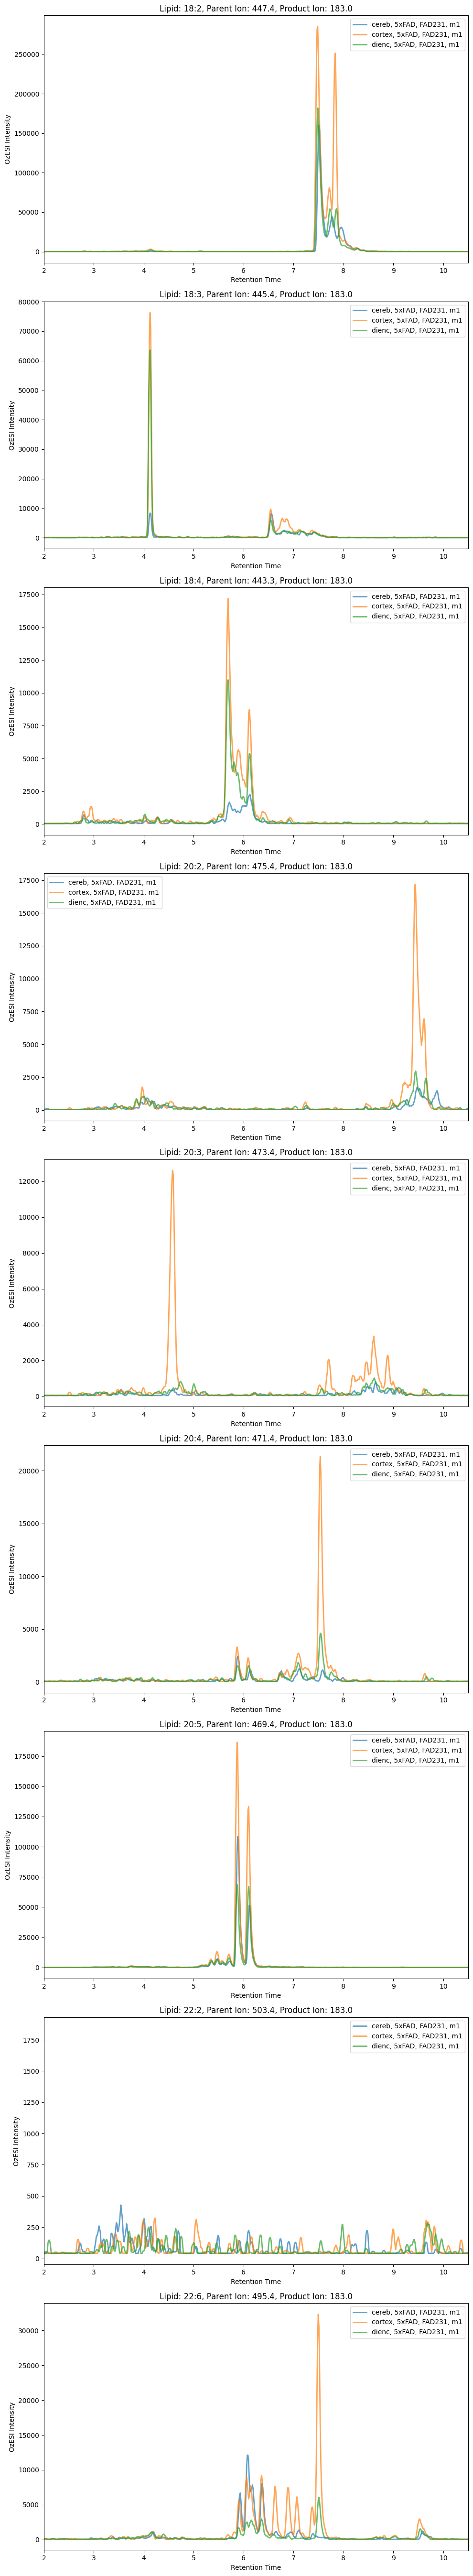

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assuming d1e is your DataFrame
# Replace the following line with your actual DataFrame
# d1e = pd.read_csv('path_to_your_data.csv')

def plot_lipid_intensity_combined(df):
    # Group by Lipid
    lipid_groups = df.groupby('Lipid')

    # Determine the number of unique lipids to create subplots
    num_lipids = len(lipid_groups)
    fig, axes = plt.subplots(num_lipids, 1, figsize=(10, 6 * num_lipids))

    # Check if axes is an array (when there are multiple lipids)
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    # Plot each lipid group in a separate subplot
    for (lipid, group), ax in zip(lipid_groups, axes):
        for (_, sub_group) in group.groupby(['Biology', 'Genotype', 'Cage', 'Mouse']):
            label = f"{sub_group['Biology'].iloc[0]}, {sub_group['Genotype'].iloc[0]}, {sub_group['Cage'].iloc[0]}, {sub_group['Mouse'].iloc[0]}"
            ax.plot(sub_group['Retention_Time'], sub_group['OzESI_Intensity'], linestyle='-', label=label, linewidth=2, alpha=0.7)

        # Extracting parent and product ion for the title
        parent_ion = group['Parent_Ion'].iloc[0]
        product_ion = group['Product_Ion'].iloc[0]

        ax.set_title(f"Lipid: {lipid}, Parent Ion: {parent_ion}, Product Ion: {product_ion}")
        ax.set_ylabel('OzESI Intensity')
        ax.legend()

        # Set x-axis limits to zoom in between 2 and 11
        ax.set_xlim(2, 10.5)

        # Make x-tick labels visible for each subplot
        for label in ax.get_xticklabels():
            label.set_visible(True)
        ax.set_xlabel('Retention Time')

    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
# Replace d1e with your actual DataFrame variable name
#print unique sample_ID
print(d1e['Sample_ID'].unique())
plot_lipid_intensity_combined(d1e)


# create Group_Sample column

In [20]:


def add_group_sample_column(df):
    """
    Adds a new column 'Group_Sample' to the DataFrame, assigning a unique group number 
    for each combination of Cage, Mouse, Genotype, Biology, and Lipid.

    Args:
    df (pandas.DataFrame): The DataFrame to process.

    Returns:
    pandas.DataFrame: The DataFrame with the added 'Group_Sample' column.
    """
    # Create the 'Group_Sample' column by assigning a group number for each combination
    df['Group_Sample'] = df.groupby(['Cage', 'Mouse', 'Genotype', 'Biology', 'Lipid']).ngroup()

    return df

# Usage Example:
# Assuming your DataFrame is named df
d1d = add_group_sample_column(d1d)
d1d




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse,Group_Sample
0,227.1,183.0,0.011583,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1,-1
1,227.1,183.0,0.024483,41.460003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1,-1
2,227.1,183.0,0.037383,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1,-1
3,227.1,183.0,0.050317,41.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1,-1
4,227.1,183.0,0.063233,41.480003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,0,NaN,9.921467,cereb,5xFAD,FAD231,m1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381966,533.5,183.0,14.935583,41.280003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1,-1
381967,533.5,183.0,14.948517,41.200005,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1,-1
381968,533.5,183.0,14.961433,41.000004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1,-1
381969,533.5,183.0,14.974350,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,161,NaN,11.589217,dienc,5xFAD,FAD231,m1,-1


# reduce dataframe to unique values

In [21]:
d1e = d1d.copy()

# Sort by 'OzESI_Intensity' in descending order so that the highest intensity is at the top
d1e.sort_values(by='OzESI_Intensity', ascending=False, inplace=True)
# Keep unique rows based on the specified columns
d1e = d1e.drop_duplicates(subset=['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Sample_ID'])
#round OzESI_Intensity to 0 decimal places
d1e['OzESI_Intensity'] = d1e['OzESI_Intensity'].round(0)
#round Correct_RT to 2 decimal places
d1e['Correct_RT'] = d1e['Correct_RT'].round(2)
#drop Match_Group  and Group_Sample columns
d1e = d1e.drop(columns=['Match_Group', 'Group_Sample'])


d1e

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse
195660,423.3,183.0,7.899983,14450771.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,423.3 -> 183.0,NaN,7.90,cortex,5xFAD,FAD231,m1
323373,423.3,183.0,7.925833,14201634.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,NaN,7.93,dienc,5xFAD,FAD231,m1
67960,423.3,183.0,8.042133,10614408.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,NaN,8.04,cereb,5xFAD,FAD231,m1
211882,447.4,183.0,7.485100,284839.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,447.4 -> 183.0,18:2,7.49,cortex,5xFAD,FAD231,m1
221045,469.4,183.0,5.869233,186438.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,469.4 -> 183.0,20:5,5.87,cortex,5xFAD,FAD231,m1
339593,447.4,183.0,7.485100,181939.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,18:2,7.49,dienc,5xFAD,FAD231,m1
84173,447.4,183.0,7.510950,159951.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,18:2,7.51,cereb,5xFAD,FAD231,m1
93335,469.4,183.0,5.882150,108535.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,469.4 -> 183.0,20:5,5.88,cereb,5xFAD,FAD231,m1
209300,445.4,183.0,4.126017,76266.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,445.4 -> 183.0,18:3,4.13,cortex,5xFAD,FAD231,m1
348756,469.4,183.0,5.869233,68615.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,469.4 -> 183.0,20:5,5.87,dienc,5xFAD,FAD231,m1


# Save OzOFF df

In [22]:
d1e.to_csv('Projects/AMP/RT/AMP_OzOFF_RT_test.csv')
d1e

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse
195660,423.3,183.0,7.899983,14450771.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,423.3 -> 183.0,NaN,7.90,cortex,5xFAD,FAD231,m1
323373,423.3,183.0,7.925833,14201634.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,NaN,7.93,dienc,5xFAD,FAD231,m1
67960,423.3,183.0,8.042133,10614408.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,NaN,8.04,cereb,5xFAD,FAD231,m1
211882,447.4,183.0,7.485100,284839.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,447.4 -> 183.0,18:2,7.49,cortex,5xFAD,FAD231,m1
221045,469.4,183.0,5.869233,186438.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,469.4 -> 183.0,20:5,5.87,cortex,5xFAD,FAD231,m1
339593,447.4,183.0,7.485100,181939.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,18:2,7.49,dienc,5xFAD,FAD231,m1
84173,447.4,183.0,7.510950,159951.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,18:2,7.51,cereb,5xFAD,FAD231,m1
93335,469.4,183.0,5.882150,108535.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,469.4 -> 183.0,20:5,5.88,cereb,5xFAD,FAD231,m1
209300,445.4,183.0,4.126017,76266.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,445.4 -> 183.0,18:3,4.13,cortex,5xFAD,FAD231,m1
348756,469.4,183.0,5.869233,68615.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,469.4 -> 183.0,20:5,5.87,dienc,5xFAD,FAD231,m1


In [23]:
d1e

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse
195660,423.3,183.0,7.899983,14450771.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,423.3 -> 183.0,NaN,7.90,cortex,5xFAD,FAD231,m1
323373,423.3,183.0,7.925833,14201634.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,NaN,7.93,dienc,5xFAD,FAD231,m1
67960,423.3,183.0,8.042133,10614408.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,NaN,8.04,cereb,5xFAD,FAD231,m1
211882,447.4,183.0,7.485100,284839.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,447.4 -> 183.0,18:2,7.49,cortex,5xFAD,FAD231,m1
221045,469.4,183.0,5.869233,186438.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,469.4 -> 183.0,20:5,5.87,cortex,5xFAD,FAD231,m1
339593,447.4,183.0,7.485100,181939.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,18:2,7.49,dienc,5xFAD,FAD231,m1
84173,447.4,183.0,7.510950,159951.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,18:2,7.51,cereb,5xFAD,FAD231,m1
93335,469.4,183.0,5.882150,108535.0,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,469.4 -> 183.0,20:5,5.88,cereb,5xFAD,FAD231,m1
209300,445.4,183.0,4.126017,76266.0,11192023_5xFAD-m1-cortex-FAD231_AMP_2x_0.05uMd...,445.4 -> 183.0,18:3,4.13,cortex,5xFAD,FAD231,m1
348756,469.4,183.0,5.869233,68615.0,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,469.4 -> 183.0,20:5,5.87,dienc,5xFAD,FAD231,m1


# filter out n-# values

In [24]:
import pandas as pd
import re

# Assuming d1d is your original DataFrame, make sure it's defined before calling this function.

def filter_lipids(df, column_name='Lipid', filter_strings=('n', 'd', 'Z', '13:0',':1')):
    """
    Filters out rows in the DataFrame where the specified column contains any of the given strings.

    Parameters:
    df (DataFrame): The DataFrame to filter.
    column_name (str): The name of the column to apply the filter on.
    filter_strings (tuple): A tuple of strings to search for within the column values.

    Returns:
    DataFrame: A new DataFrame with the filtered rows removed.
    """
    # Join the filter strings into a regular expression pattern
    pattern = '|'.join(re.escape(s) for s in filter_strings)
    
    # Use a boolean mask to filter out the rows
    mask = ~df[column_name].astype(str).str.contains(pattern, na=False, regex=True)
    return df[mask]

# Apply the function to the DataFrame
d2 = filter_lipids(d1d)  # Replace d1d with your actual DataFrame variable name

#reset index
d2.reset_index(drop=True, inplace=True)
#print unqiue values of Lipid
print(d2['Lipid'].unique())
#order by Lipid
d2 = d2.sort_values(by=['Biology','Lipid'])
d2


['18:4' '18:3' '18:2' '20:5' '20:4' '20:3' '20:2' '22:6' '22:2']


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Correct_RT,Biology,Genotype,Cage,Mouse,Group_Sample
2322,447.4,183.0,0.004250,41.440002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,108,18:2,7.510950,cereb,5xFAD,FAD231,m1,0
2323,447.4,183.0,0.017150,41.320004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,108,18:2,7.510950,cereb,5xFAD,FAD231,m1,0
2324,447.4,183.0,0.030067,49.720005,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,108,18:2,7.510950,cereb,5xFAD,FAD231,m1,0
2325,447.4,183.0,0.042967,50.500004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,108,18:2,7.510950,cereb,5xFAD,FAD231,m1,0
2326,447.4,183.0,0.055883,49.720005,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,447.4 -> 183.0,108,18:2,7.510950,cereb,5xFAD,FAD231,m1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30181,495.4,183.0,14.937867,82.820007,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,495.4 -> 183.0,143,22:6,7.508667,dienc,5xFAD,FAD231,m1,26
30182,495.4,183.0,14.950783,57.360004,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,495.4 -> 183.0,143,22:6,7.508667,dienc,5xFAD,FAD231,m1,26
30183,495.4,183.0,14.963700,40.940002,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,495.4 -> 183.0,143,22:6,7.508667,dienc,5xFAD,FAD231,m1,26
30184,495.4,183.0,14.976633,40.980003,11192023_5xFAD-m1-dienc-FAD231_AMP_2x_0.05uMd2...,495.4 -> 183.0,143,22:6,7.508667,dienc,5xFAD,FAD231,m1,26
